In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import tree
import sklearn.linear_model as LM
from sklearn import ensemble
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error

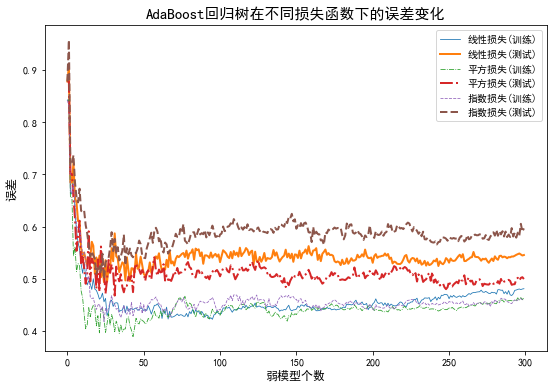

In [2]:
N=1000
X,Y=make_regression(n_samples=N,n_features=10,random_state=123)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)

B=300
dt_stump = tree.DecisionTreeRegressor(max_depth=1, min_samples_leaf=1)
Loss=['linear', 'square', 'exponential']
LossName=['线性损失','平方损失','指数损失']
Lines=['-','-.','--']
plt.figure(figsize=(9,6))
for lossname,loss,lines in zip(LossName,Loss,Lines):
    TrainErrAdaB=np.zeros((B,))
    TestErrAdaB=np.zeros((B,))
    adaBoost = ensemble.AdaBoostRegressor(base_estimator=dt_stump,n_estimators=B,loss=loss,random_state=123)
    adaBoost.fit(X_train,Y_train)
    for b,Y_pred in enumerate(adaBoost.staged_predict(X_train)):
        TrainErrAdaB[b]=1-r2_score(Y_train,Y_pred) 
    for b,Y_pred in enumerate(adaBoost.staged_predict(X_test)):
        TestErrAdaB[b]=1-r2_score(Y_test,Y_pred)
    plt.plot(np.arange(B),TrainErrAdaB,linestyle=lines,label="%s(训练)"%lossname,linewidth=0.8)
    plt.plot(np.arange(B),TestErrAdaB,linestyle=lines,label="%s(测试)"%lossname,linewidth=2)
plt.title("AdaBoost回归树在不同损失函数下的误差变化",fontsize=15)
plt.xlabel("弱模型个数",fontsize=12)
plt.ylabel("误差",fontsize=12)
plt.legend()


说明：基于模拟数据对比不同损失函数下的训练误差和测试误差
